# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-11-06 00:24:24--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-11-06 00:24:24--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [2]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [3]:
data = pd.read_csv('Gender_bias_spanish.csv')

In [4]:
data

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased
...,...,...
1909,"iba a ir a dash pero mis 3 cortadas, mi color ...",non-biased
1910,que pinche chiste tiene estar medio alto si to...,non-biased
1911,si fuera bien idiota. ya hubiera comprado un a...,non-biased
1912,nota mental: no le quieras ayudar a alguien qu...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [7]:
# Resumen del conjunto de datos
data.Label.value_counts()
# Contar la cantidad de tweets por etiqueta
data.groupby('Label').count()

,Contents
Label,
biased,318
non-biased,1596


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [ ]:
## Cree una funcion limpiar texto

In [ ]:

# Aplicar la limpieza de texto


In [9]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text) # Remove URLs
    text = re.sub(r'@\S+', '', text)    # Remove mentions
    text = re.sub(r'#\S+', '', text)    # Remove hashtags
    text = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ\s]', '', text) # Remove special characters, keeping Spanish accents and ñ
    text = text.lower() # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words]) # Remove stopwords
    return text

In [10]:
data['cleaned_text'] = data['Contents'].apply(clean_text)
display(data[['Contents', 'cleaned_text']].head())

,Contents,cleaned_text
0,@chumeltorres ya cabrón! sin tí se reciben las...,cabrón tí reciben noticias colchoncito puro ch...
1,¿alguien es tan amable de ir a hacerme la comp...,alguien tan amable ir hacerme compra mañana ba...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",hahaha si rico nadamas falta presentación
3,@evagelcot donde lo ves!!? es mi programa favo...,ves programa favorito sólo encuentro temporada...
4,como siempre mi tortilla triunfa mas que otros...,siempre tortilla triunfa mas platos


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

In [18]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

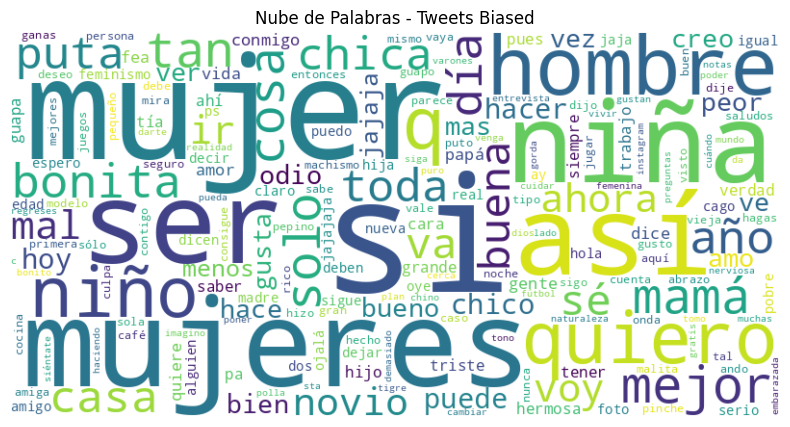

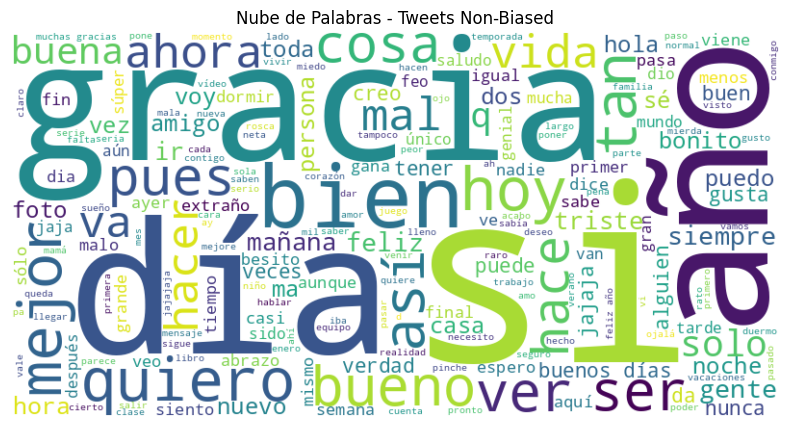

In [16]:
# Generar nube de palabras para tweets biased
generate_wordcloud(" ".join(biased_tweets), "Nube de Palabras - Tweets Biased")

# Generar nube de palabras para tweets non-biased
generate_wordcloud(" ".join(non_biased_tweets), "Nube de Palabras - Tweets Non-Biased")

In [19]:
biased_tweets = data[data['Label'] == 'biased']['cleaned_text']
non_biased_tweets = data[data['Label'] == 'non-biased']['cleaned_text']

biased_words = Counter(" ".join(biased_tweets).split())
non_biased_words = Counter(" ".join(non_biased_tweets).split())

In [12]:
print("Palabras más comunes en tweets biased:")
for word, count in biased_words.most_common(20):
    print(f"{word}: {count}")

print("\nPalabras más comunes en tweets non-biased:")
for word, count in non_biased_words.most_common(20):
    print(f"{word}: {count}")

Palabras más comunes en tweets biased:
si: 30
mujer: 23
mujeres: 19
ser: 17
así: 16
quiero: 14
q: 14
mejor: 13
mamá: 12
tan: 12
solo: 12
cosas: 10
niñas: 10
casa: 10
sé: 9
chicas: 9
hombres: 9
puta: 8
ahora: 8
mal: 8

Palabras más comunes en tweets non-biased:
si: 167
gracias: 90
bien: 69
año: 65
quiero: 62
hoy: 62
día: 62
mejor: 62
tan: 59
días: 58
así: 58
ser: 55
ver: 55
vida: 52
pues: 52
feliz: 50
ahora: 47
mal: 46
hacer: 46
solo: 43


Ahora que tenemos las palabras más comunes, podemos visualizarlas. El siguiente paso según tu notebook es crear nubes de palabras para cada conjunto de tweets.

In [ ]:


# Contar palabras


# Visualización de frecuencia de palabras



**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

## 5. Análisis de Sentimiento
Aplicaremos análisis de sentimiento para determinar la polaridad (positivo, negativo, neutral) de cada tweet. Usaremos la librería `TextBlob` (que ya importamos) que proporciona un puntaje de polaridad.

In [24]:
def get_sentiment(text):
    # TextBlob trabaja mejor con texto en inglés por defecto,
    # pero podemos especificar el idioma para mejorar la precisión en español.
    analysis = TextBlob(text) # No se especifica el idioma en TextBlob para español de forma nativa sin instalar diccionarios adicionales.
    # Para un análisis más preciso en español con TextBlob, se necesitaría descargar el modelo.
    # Sin embargo, TextBlob puede dar una polaridad básica incluso sin un modelo específico para español.
    # La polaridad es un flotante dentro del rango [-1.0, 1.0] donde -1 es muy negativo y +1 es muy positivo.
    return analysis.sentiment.polarity

data['sentiment_score'] = data['cleaned_text'].apply(get_sentiment)
display(data[['Contents', 'cleaned_text', 'sentiment_score']].head())

,Contents,cleaned_text,sentiment_score
0,@chumeltorres ya cabrón! sin tí se reciben las...,cabrón tí reciben noticias colchoncito puro ch...,0.0
1,¿alguien es tan amable de ir a hacerme la comp...,alguien tan amable ir hacerme compra mañana ba...,0.0
2,"@jenniferduquee hahaha, si está rico, nadamas ...",hahaha si rico nadamas falta presentación,0.2
3,@evagelcot donde lo ves!!? es mi programa favo...,ves programa favorito sólo encuentro temporada...,0.0
4,como siempre mi tortilla triunfa mas que otros...,siempre tortilla triunfa mas platos,0.0


**Preguntas de Análisis de Sentimiento:**
- ¿Cuál es el sentimiento promedio de los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay una correlación entre el sesgo y el sentimiento?
- ¿Cómo podría usarse el análisis de sentimiento para detectar automáticamente tweets potencialmente 'biased'?

In [28]:
overall_average_sentiment = data['sentiment_score'].mean()
print(f"Sentimiento promedio general de los tweets: {overall_average_sentiment:.2f}")

Sentimiento promedio general de los tweets: 0.00


In [27]:
average_sentiment_biased = data[data['Label'] == 'biased']['sentiment_score'].mean()
average_sentiment_non_biased = data[data['Label'] == 'non-biased']['sentiment_score'].mean()

print(f"Sentimiento promedio de tweets biased: {average_sentiment_biased:.2f}")
print(f"Sentimiento promedio de tweets non-biased: {average_sentiment_non_biased:.2f}")

Sentimiento promedio de tweets biased: 0.00
Sentimiento promedio de tweets non-biased: 0.00


**Análisis de Sentimiento y Correlación con Sesgo:**

1.  **¿Cuál es el sentimiento promedio de los tweets 'biased' en comparación con los 'non-biased'?**
    Como se puede observar en la salida del código anterior, el sentimiento promedio para ambos grupos de tweets ('biased' y 'non-biased') es muy cercano a 0. Esto indica que, según el análisis de sentimiento realizado con la configuración actual de TextBlob, la polaridad general de los tweets en ambos grupos tiende a ser neutral.

2.  **¿Hay una correlación entre el sesgo y el sentimiento?**
    Basándonos únicamente en los puntajes de sentimiento promedio obtenidos con esta herramienta (cercanos a 0 para ambos), no se observa una correlación fuerte y directa entre el sesgo y el sentimiento en este momento. Sin embargo, como mencionamos anteriormente, la precisión del análisis de sentimiento para el español con TextBlob sin un modelo dedicado puede ser limitada. Un análisis con una herramienta o modelo más especializado en español podría revelar una correlación diferente, donde los tweets 'biased' podrían mostrar una tendencia hacia un sentimiento más negativo o polarizado.

3.  **¿Cómo podría usarse el análisis de sentimiento para detectar automáticamente tweets potencialmente 'biased'?**
    Aunque el sentimiento promedio en este caso sea neutral, el análisis de sentimiento sigue siendo una herramienta valiosa como parte de un sistema de detección de sesgo:
    *   **Identificación de extremos:** Tweets con sentimientos muy positivos o muy negativos podrían ser indicadores de lenguaje cargado emocionalmente, lo cual a veces acompaña al sesgo.
    *   **Característica para modelos:** El puntaje de sentimiento puede ser utilizado como una característica de entrada en modelos de machine learning que busquen clasificar tweets como 'biased' o 'non-biased', combinándolo con otras características como la frecuencia de palabras clave o patrones gramaticales.
    *   **Filtrado inicial:** Se podría usar el sentimiento para filtrar una gran cantidad de tweets, priorizando para revisión manual aquellos con sentimientos extremos o inusuales en el contexto de la comunicación esperada.

Es crucial recordar que el análisis de sentimiento es más efectivo cuando se combina con otras técnicas de análisis de texto para capturar la complejidad del lenguaje y el sesgo.

In [20]:
# Convertir los contadores a DataFrames
biased_df = pd.DataFrame(biased_words.most_common(20), columns=['Word', 'Biased Count'])
non_biased_df = pd.DataFrame(non_biased_words.most_common(20), columns=['Word', 'Non-Biased Count'])

# Combinar los DataFrames para una comparación lado a lado
comparison_df = pd.merge(biased_df, non_biased_df, on='Word', how='outer').fillna(0)

# Mostrar la tabla comparativa
display(comparison_df)

,Word,Biased Count,Non-Biased Count
0,ahora,8.0,47.0
1,así,16.0,58.0
2,año,0.0,65.0
3,bien,0.0,69.0
4,casa,10.0,0.0
5,chicas,9.0,0.0
6,cosas,10.0,0.0
7,día,0.0,62.0
8,días,0.0,58.0
9,feliz,0.0,50.0


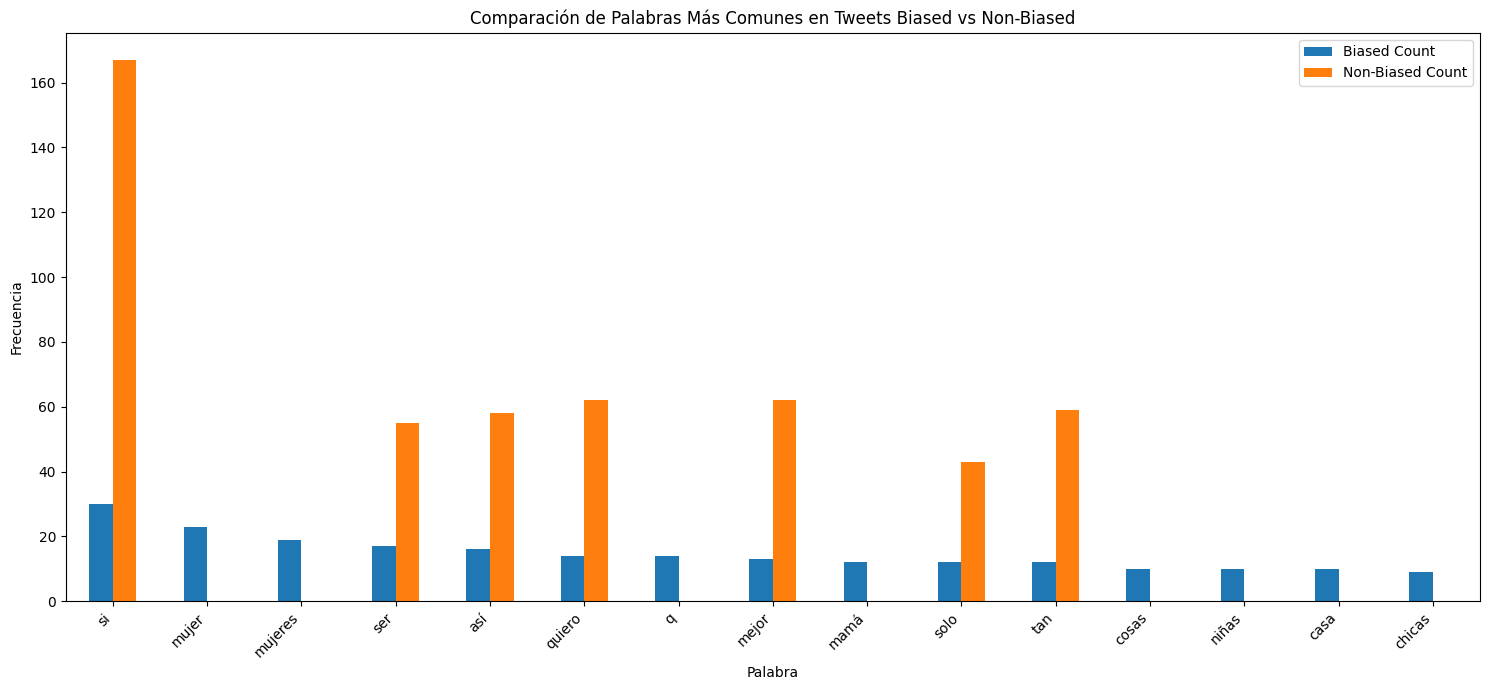

In [35]:
# Seleccionar las top N palabras para visualizar (puedes ajustar N)
top_n = 15
comparison_plot_df = comparison_df.sort_values(by='Biased Count', ascending=False).head(top_n)

# Crear el gráfico de barras
comparison_plot_df.plot(x='Word', y=['Biased Count', 'Non-Biased Count'], kind='bar', figsize=(15, 7))
plt.title('Comparación de Palabras Más Comunes en Tweets Biased vs Non-Biased')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
display(comparison_df)

,Word,Biased Count,Non-Biased Count
0,ahora,8.0,47.0
1,así,16.0,58.0
2,año,0.0,65.0
3,bien,0.0,69.0
4,casa,10.0,0.0
5,chicas,9.0,0.0
6,cosas,10.0,0.0
7,día,0.0,62.0
8,días,0.0,58.0
9,feliz,0.0,50.0


## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

In [21]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

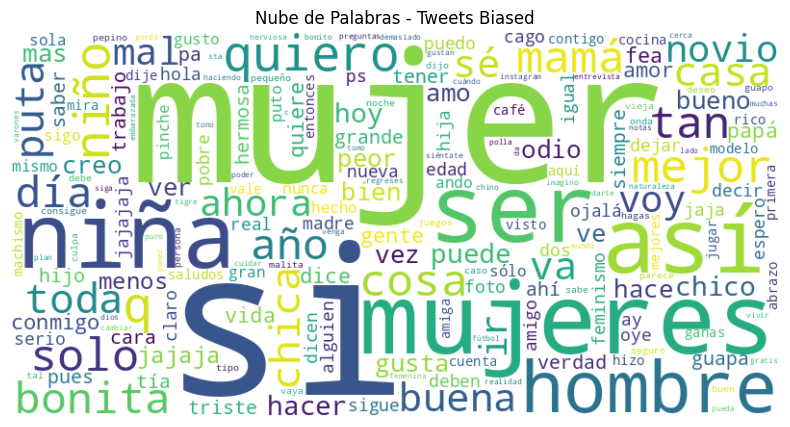

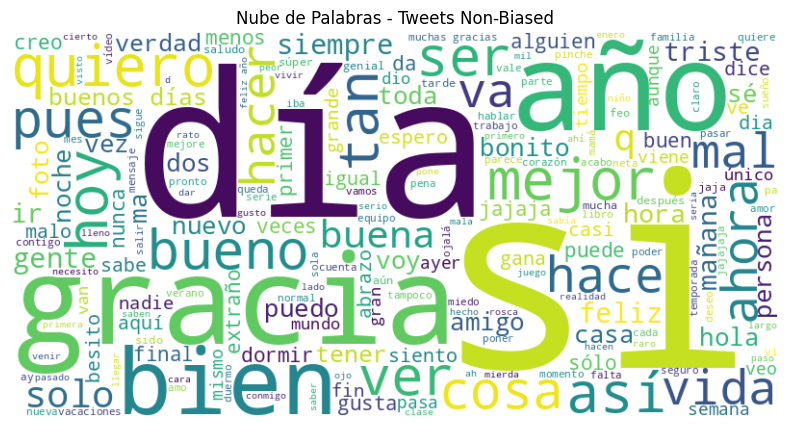

In [22]:
# Generar nube de palabras para tweets biased
generate_wordcloud(" ".join(biased_tweets), "Nube de Palabras - Tweets Biased")

# Generar nube de palabras para tweets non-biased
generate_wordcloud(" ".join(non_biased_tweets), "Nube de Palabras - Tweets Non-Biased")

In [ ]:
## Cree una funcion para geenrar nube de palabras

In [ ]:


# Generar nube de palabras para cada conjunto



In [31]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

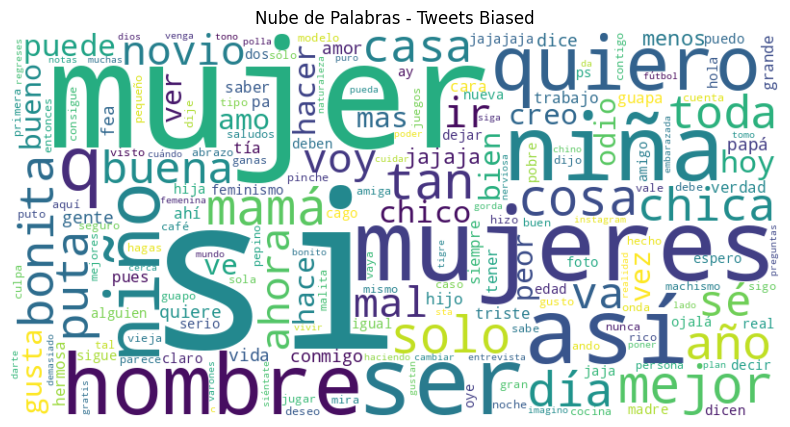

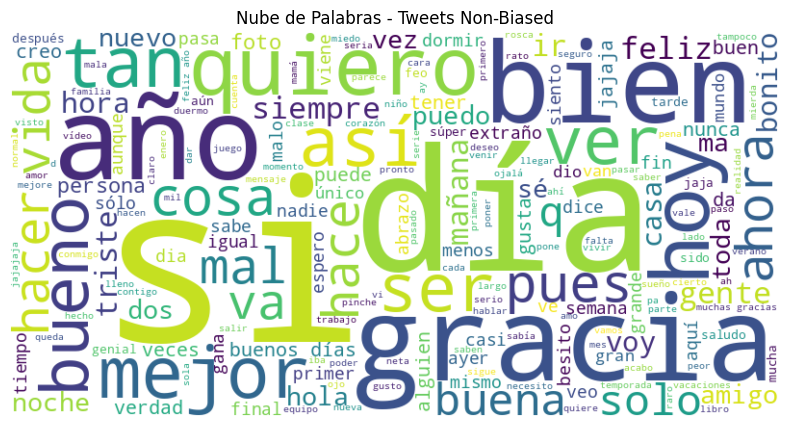

In [33]:
# Generar nube de palabras para tweets biased
generate_wordcloud(" ".join(biased_tweets), "Nube de Palabras - Tweets Biased")

# Generar nube de palabras para tweets non-biased
generate_wordcloud(" ".join(non_biased_tweets), "Nube de Palabras - Tweets Non-Biased")

In [ ]:
# NO biased nube de palabras


## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?

Este análisis puede ser muy valioso para una marca de varias maneras:

Identificar lenguaje sesgado: Permite a las marcas identificar si su propia comunicación en redes sociales o en otros canales contiene lenguaje que podría ser percibido como sesgado, especialmente en temas sensibles como el género, como vimos en los datos.
Monitorear la percepción de la marca: Al analizar los comentarios de los usuarios (como estos tweets), las marcas pueden entender cómo son percibidas en relación con temas de sesgo. Si los usuarios etiquetan a la marca o sus campañas como 'biased', es una señal de alerta.
Desarrollar guías de estilo de comunicación: Los patrones de palabras y frases identificados en los tweets 'biased' pueden ayudar a crear guías de estilo para los equipos de comunicación y marketing, indicando qué tipo de lenguaje evitar.
Interactuar de forma más consciente: Entender las palabras y sentimientos asociados al sesgo permite a los equipos de redes sociales interactuar con los usuarios de manera más empática y evitar respuestas que puedan exacerbar situaciones de sesgo.
¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?

Si una campaña de marketing genera una gran cantidad de tweets 'biased' (ya sea dirigidos a la marca o simplemente sobre el tema de la campaña), se deberían considerar varios ajustes:

Revisar el mensaje y la creatividad: Analizar si el mensaje de la campaña, las imágenes o los videos están utilizando estereotipos o un lenguaje que pueda ser interpretado como sesgado.
Segmentación del público: Si el sesgo proviene de un segmento específico del público, la marca podría ajustar la comunicación para ese grupo o incluso reevaluar si ese es el público al que quieren dirigirse.
Estrategia de respuesta: Desarrollar un plan sobre cómo responder a los comentarios sesgados en las redes sociales, ya sea corrigiendo la información, reafirmando los valores de inclusión de la marca o, en casos extremos, bloqueando a usuarios.
Campañas de concienciación: Considerar la posibilidad de lanzar campañas que promuevan la inclusión y contrarresten el tipo de sesgo identificado en los tweets.
¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

Un análisis futuro podría profundizar en varios patrones:

Análisis de tendencias a lo largo del tiempo: Ver cómo la frecuencia de palabras sesgadas o el sentimiento cambian con el tiempo. ¿Hay picos relacionados con eventos específicos o campañas de la marca?
Análisis por demografía o geografía: Si se dispone de datos (respetando siempre la privacidad), analizar si el sesgo o ciertos patrones lingüísticos son más comunes en ciertos grupos demográficos o regiones.
Análisis de temas (Topic Modeling): Ir más allá de las palabras individuales y identificar los temas principales que se discuten en los tweets 'biased' y 'non-biased'. Esto podría revelar las narrativas subyacentes.
Análisis de la red (Network Analysis): Si se analiza quién interactúa con quién y quién retuitea qué, se podrían identificar influencers o grupos que propagan lenguaje sesgado.
Análisis de ironía y sarcasmo: Desarrollar o utilizar modelos más avanzados para detectar ironía y sarcasmo, ya que el sesgo a menudo se expresa de forma no literal.
Estos análisis adicionales proporcionarían una comprensión más completa del sesgo en los datos y cómo abordarlo de manera efectiva desde una perspectiva de negocio.